In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal
from scipy.optimize import minimize

In [51]:
def heatmap_gaussian(w0_mesh, w1_mesh, z, title_str= None, point=None) :
    plt.clf()
    plt.pcolormesh(w0_mesh, w1_mesh, z, cmap='jet')
    plt.colorbar()
    if(point != None):
        plt.plot(point[0], point[1],'bo')
    plt.xlabel("w_0")
    plt.ylabel("w_1")
    plt.title(title_str)
    plt.show()

def plot_samples(mean, cov, title_str= None, point=None):
    w_sample = multivariate_normal.rvs(mean, cov, 20)
    plt.clf()
    x = np.linspace(-1, 1, 50)
    for i in w_sample:
        y = i[0] + i[1]*x
        ind = np.logical_and(y<=1, y>=-1)
        plt.plot(x[ind], y[ind], 'r-')
    if(point!=None):
        plt.plot(point[0], point[1], 'bo')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title_str)
    plt.show()

def posterior(x, y, alpha = 2, beta = 25):
    x = np.vstack((np.ones(x.shape), x))
    s_n = np.linalg.inv(alpha + beta*np.matmul(x,np.transpose(x)))
    m_n = np.dot(s_n, beta*np.matmul(x,y.reshape(-1,1)))
    return(m_n.flatten(), s_n)

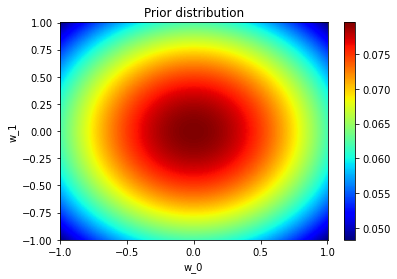

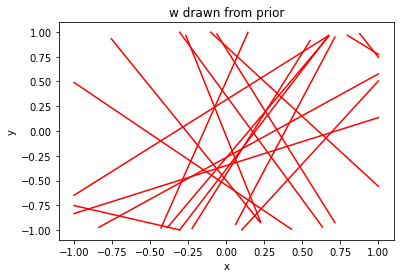

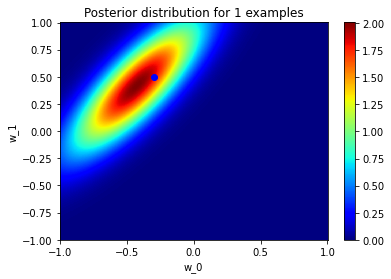

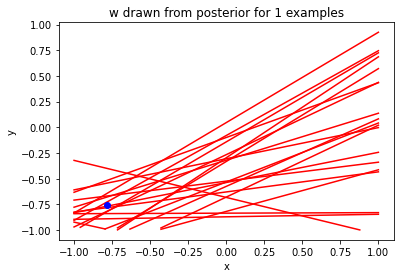

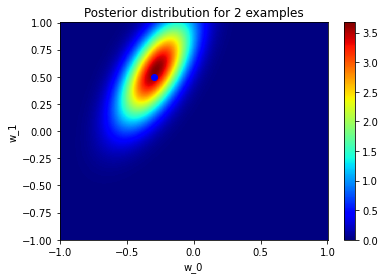

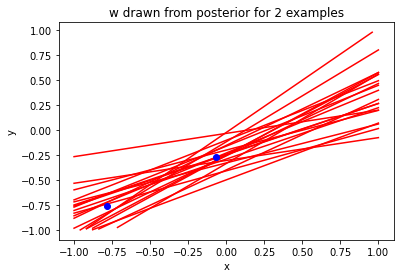

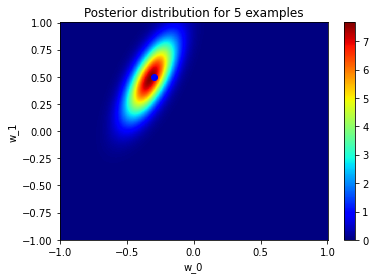

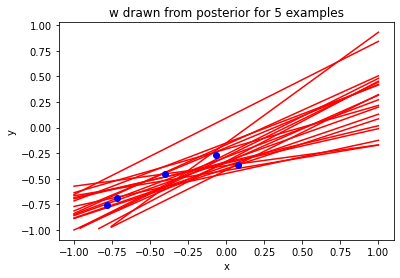

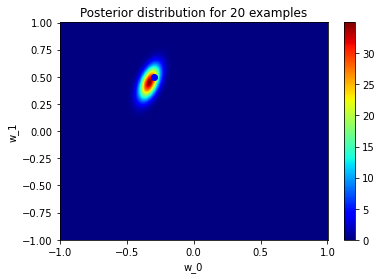

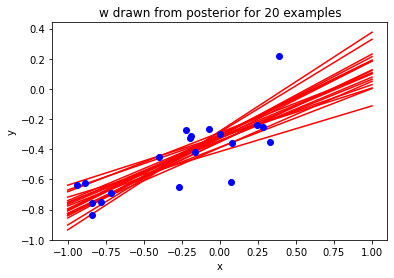

In [53]:
# ground truth and training data generation
np.random.seed(15)
w0_true = -0.3
w1_true = 0.5
noise =  np.random.normal(0, 0.2, 20)
x_train = np.random.uniform(-1,1,20)
y_train = (w0_true + x_train*w1_true + noise)

#parameters to plot the graph
grid_len = 1000
w0_range = [-1,1]
w1_range = [-1,1]

w0 = np.linspace(w0_range[0], w0_range[1], grid_len)
w1 = np.linspace(w1_range[0], w1_range[1], grid_len)
w0_mesh,w1_mesh=np.meshgrid(w0,w1)
W = np.transpose(np.vstack((w0_mesh.flatten(), w1_mesh.flatten())))

# plotting the prior
prior = multivariate_normal.pdf(W, [0,0], [[2,0],[0, 2]]).reshape(grid_len, grid_len)
heatmap_gaussian(w0_mesh, w1_mesh, prior, "Prior distribution")

# to plot the sampled models from the prior 
plot_samples([0,0], [[2,0],[0, 2]], "w drawn from prior")

#to compute posterior distribution
t=[1,2,5,20]
for i in t:

    m_n, s_n = posterior(x_train[0:i], y_train[0:i])
    pos_dist = multivariate_normal.pdf(W, m_n, s_n).reshape(grid_len, grid_len)
    heatmap_gaussian(w0_mesh, w1_mesh, pos_dist, "Posterior distribution for {} examples".format(i), [w0_true, w1_true])
    plot_samples(m_n, s_n, "w drawn from posterior for {} examples".format(i), [x_train[0:i], y_train[0:i]])
